In [1]:
%matplotlib inline
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.io import fits

plt.style.use('seaborn-v0_8-whitegrid')

In [2]:
# Resolve repository root and FITS path
PROJECT_ROOT = Path('..').resolve().parent
DATA_PATH = PROJECT_ROOT / 'data' / 'HD122563_normrv.fits'

print('Project root:', PROJECT_ROOT)
print('FITS file:', DATA_PATH)
if not DATA_PATH.exists():
    raise FileNotFoundError(f'Missing FITS file at {DATA_PATH}')

Project root: /lustre06/project/6016730/minjihk/WEAVE_Pristine
FITS file: /lustre06/project/6016730/minjihk/WEAVE_Pristine/data/HD122563_normrv.fits


In [3]:
# Load the FITS file, show HDU info, and preview the primary data table
with fits.open(DATA_PATH) as hdul:
    print('Available HDUs:')
    hdul.info()
    if len(hdul) > 1 and hdul[1].data is not None:
        data = hdul[1].data
        header = hdul[1].header
    else:
        data = hdul[0].data
        header = hdul[0].header

if data is None:
    raise ValueError('No data array found in FITS file.')

if isinstance(data, np.ndarray) and data.dtype.names:
    # Structured array (table) -> convert to DataFrame for easier preview
    df = pd.DataFrame(np.array(data).byteswap().newbyteorder())
    display(df.head())
    columns = list(df.columns)
    lower = [c.lower() for c in columns]
    wave_col = next((c for c in columns if 'wave' in c.lower() or 'lambda' in c.lower()), columns[0])
    flux_col = next((c for c in columns if 'flux' in c.lower() or 'int' in c.lower() or 'spec' in c.lower()), columns[-1])
    wavelength = df[wave_col].to_numpy(dtype=float)
    flux = df[flux_col].to_numpy(dtype=float)
else:
    # Assume plain array (flux only)
    arr = np.array(data, dtype=float)
    df = pd.DataFrame({'pixel': np.arange(arr.size), 'flux': arr})
    display(df.head())
    wavelength = df['pixel'].to_numpy(dtype=float)
    flux = df['flux'].to_numpy(dtype=float)

print(f'Detected {wavelength.size} spectral points.')

Available HDUs:
Filename: /lustre06/project/6016730/minjihk/WEAVE_Pristine/data/HD122563_normrv.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      35   (206769,)   float32   


,pixel,flux
0,0,-0.041474
1,1,0.011393
2,2,0.088016
3,3,0.043795
4,4,-0.117119


Detected 206769 spectral points.


In [4]:
# Load the accompanying .xy file and preview the first few rows
XY_PATH = PROJECT_ROOT / 'data' / 'HD122563_normrv.xy'
if not XY_PATH.exists():
    raise FileNotFoundError(f'Missing XY file at {XY_PATH}')

xy_data = np.loadtxt(XY_PATH)
if xy_data.ndim != 2 or xy_data.shape[1] < 2:
    raise ValueError('Expected the .xy file to have at least two columns (wavelength, flux).')

wavelength_xy = xy_data[:, 0]
flux_xy = xy_data[:, 1]
xy_df = pd.DataFrame({'wavelength': wavelength_xy, 'flux': flux_xy})
display(xy_df.head())
print(f'Loaded XY spectrum with {len(wavelength_xy)} points.')

,wavelength,flux
0,3510.689565,-0.044677
1,3510.708346,-0.021730
2,3510.727127,0.044864
3,3510.745909,-0.041840
4,3510.764691,0.183946


Loaded XY spectrum with 206769 points.


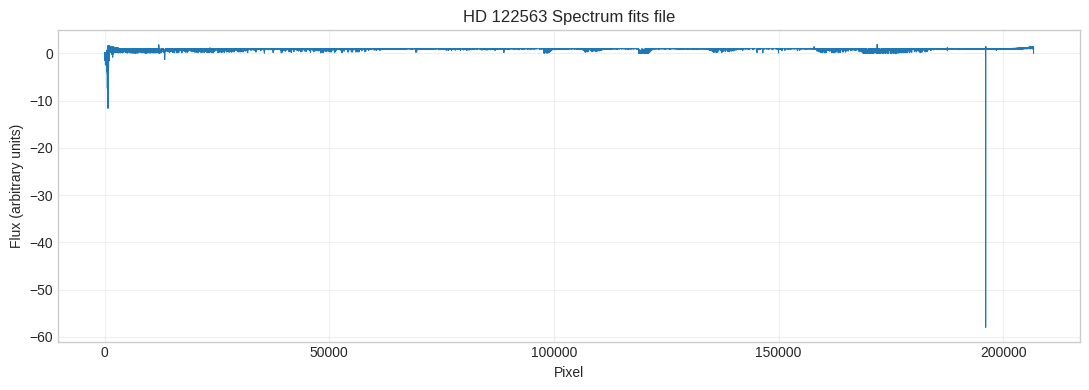

In [8]:
# Plot the spectrum
fig, ax = plt.subplots(figsize=(11, 4))
ax.plot(wavelength, flux, lw=0.8, color='tab:blue')
ax.set_xlabel('Pixel')
ax.set_ylabel('Flux (arbitrary units)')
ax.set_title('HD 122563 Spectrum fits file')
ax.grid(True, alpha=0.3)
plt.tight_layout()

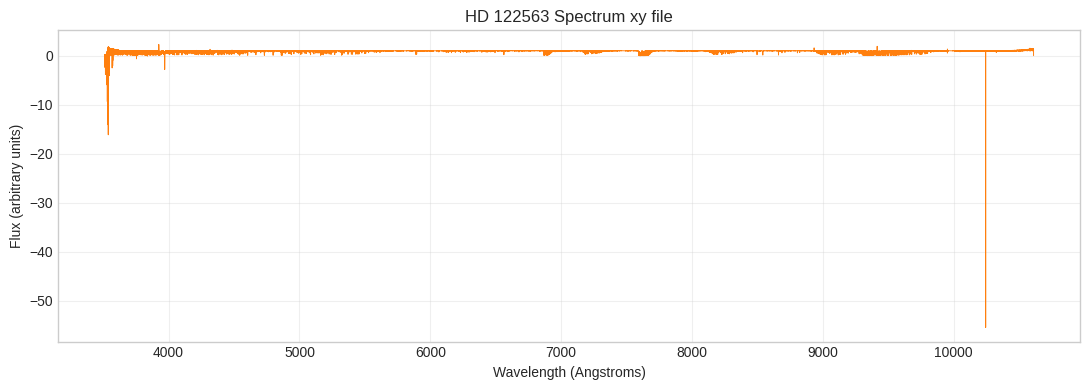

In [7]:
# Plot the XY spectrum (and optionally compare with FITS if lengths match)
fig, ax = plt.subplots(figsize=(11, 4))
ax.plot(wavelength_xy, flux_xy, lw=0.7, color='tab:orange', label='XY spectrum')
ax.set_xlabel('Wavelength (Angstroms)')
ax.set_ylabel('Flux (arbitrary units)')
ax.set_title('HD 122563 Spectrum xy file')
ax.grid(True, alpha=0.3)
plt.tight_layout()